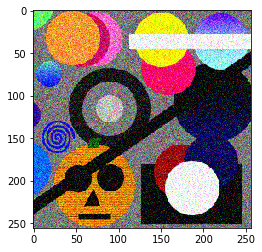

In [12]:
import cv2 as cv
import sys
import numpy as np
import matplotlib.pyplot as plt

filename = 'hough_images/circles.png'
# Loads an image
src = cv.imread(filename, cv.IMREAD_COLOR)


gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)


gray = cv.medianBlur(gray, 5)


rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                           param1=100, param2=30,
                           minRadius=15, maxRadius=17)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(src, center, radius, (255, 0, 255), 3)


plt.imshow(src[:,:,::-1], cmap='gray')